# Laptop Price Prediction - Machine Learning Project

# Eastern Africa Statistical Training Centre
# Subject:Machine Learning
# Bachelor Degree in Data science
# Test 2
# Group No 53 & 54

This notebook implements a complete machine learning workflow to predict laptop prices using Linear Regression and Decision Tree models.

## Table of Contents
1. Data Loading and Exploration
2. Data Preprocessing
3. Model Training (Linear Regression & Decision Tree)
4. Model Evaluation and Comparison
5. Visualization
6. Save Best Model

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('All libraries imported successfully!')

All libraries imported successfully!


## 1. Data Loading and Exploration

In [29]:
# Load the dataset
df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_Tsh,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,3818116.5,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,2561979.0,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,1638750.0,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,7231732.5,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,5140260.0,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,1818300.0,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,4272150.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,652650.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,2177400.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [30]:
# Display first few rows
df.head(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_Tsh,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,3818116.5,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,2561979.0,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,1638750.0,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,7231732.5,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,5140260.0,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,1140000.0,Standard,1366,...,No,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,6098914.5,Standard,2880,...,Yes,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,3302295.0,Standard,1440,...,No,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,4260750.0,Full HD,1920,...,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,2194500.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620


In [31]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_Tsh             1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [32]:
# Statistical summary
df.describe()

,Inches,Ram,Weight,Price_Tsh,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,3.234662e+06,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,1.997145e+06,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,4.959000e+05,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,1.735650e+06,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,2.818650e+06,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,4.265025e+06,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,1.738215e+07,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [33]:
# Check for missing values
df.isnull().sum()


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_Tsh               0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

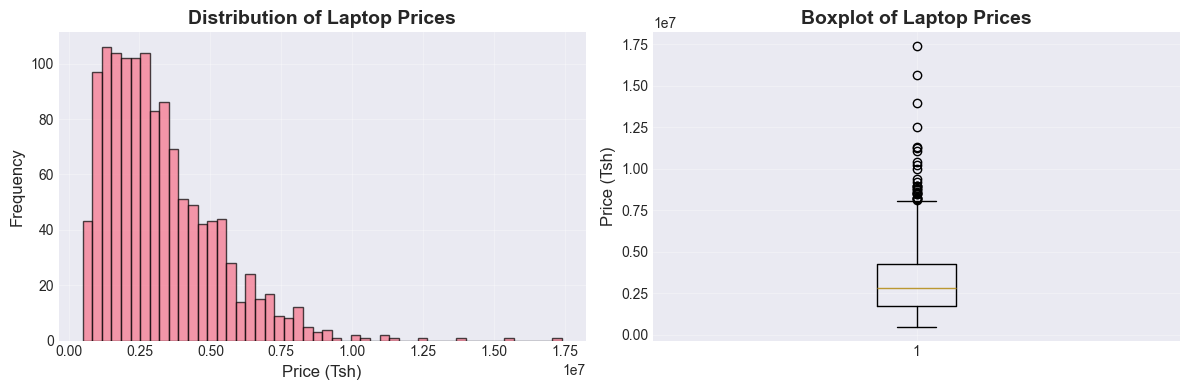

Mean Price: 3,234,661.82 Tsh
Median Price: 2,818,650.00 Tsh
Min Price: 495,900.00 Tsh
Max Price: 17,382,150.00 Tsh


In [34]:
# Target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Price_Tsh'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price (Tsh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Laptop Prices', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Price_Tsh'])
plt.ylabel('Price (Tsh)', fontsize=12)
plt.title('Boxplot of Laptop Prices', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean Price: {df['Price_Tsh'].mean():,.2f} Tsh")
print(f"Median Price: {df['Price_Tsh'].median():,.2f} Tsh")
print(f"Min Price: {df['Price_Tsh'].min():,.2f} Tsh")
print(f"Max Price: {df['Price_Tsh'].max():,.2f} Tsh")

## 2. Data Preprocessing

In [35]:
# Create a copy for preprocessing
df_processed = df.copy()

print("Original dataset shape:", df_processed.shape)

Original dataset shape: (1275, 23)


In [36]:
# from the dataset we can not work with all the features so we Select important features for modeling
# We'll focus on the most relevant features according to our model of choice

selected_features = [
    'Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
    'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company',
    'CPU_freq', 'PrimaryStorage', 'GPU_company', 'Price_Tsh'
]

df_processed = df_processed[selected_features]
print("Selected features:", df_processed.shape[1] - 1)  # -1 for target variable

Selected features: 13


In [37]:
# Handle missing values
print("Missing values before handling:")
print(df_processed.isnull().sum())
print()

# Drop rows with missing values (if any)
df_processed = df_processed.dropna()
print(f"Dataset shape after handling missing values: {df_processed.shape}")

Missing values before handling:
Company           0
TypeName          0
Inches            0
Ram               0
OS                0
Weight            0
Touchscreen       0
IPSpanel          0
RetinaDisplay     0
CPU_company       0
CPU_freq          0
PrimaryStorage    0
GPU_company       0
Price_Tsh         0
dtype: int64

Dataset shape after handling missing values: (1275, 14)


In [38]:
# Convert categorical Yes/No to binary
binary_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

for col in binary_columns:
    df_processed[col] = (df_processed[col] == 'Yes').astype(int)
print(df_processed[binary_columns].head())

   Touchscreen  IPSpanel  RetinaDisplay
0            0         1              1
1            0         0              0
2            0         0              0
3            0         1              1
4            0         1              1


In [39]:
# Encode categorical variables
categorical_columns = ['Company', 'TypeName', 'OS', 'CPU_company', 'GPU_company']

# Create label encoders dictionary to save for later use
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values")


Company: 19 unique values
TypeName: 6 unique values
OS: 9 unique values
CPU_company: 3 unique values
GPU_company: 4 unique values


In [40]:
# Check for any remaining non-numeric data
print(df_processed.dtypes)
df_processed.head()

Company             int64
TypeName            int64
Inches            float64
Ram                 int64
OS                  int64
Weight            float64
Touchscreen         int64
IPSpanel            int64
RetinaDisplay       int64
CPU_company         int64
CPU_freq          float64
PrimaryStorage      int64
GPU_company         int64
Price_Tsh         float64
dtype: object


,Company,TypeName,Inches,Ram,OS,Weight,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,GPU_company,Price_Tsh
0,1,4,13.3,8,8,1.37,0,1,1,1,2.3,128,2,3818116.5
1,1,4,13.3,8,8,1.34,0,0,0,1,1.8,128,2,2561979.0
2,7,3,15.6,8,4,1.86,0,0,0,1,2.5,256,2,1638750.0
3,1,4,15.4,16,8,1.83,0,1,1,1,2.7,512,0,7231732.5
4,1,4,13.3,8,8,1.37,0,1,1,1,3.1,256,2,5140260.0


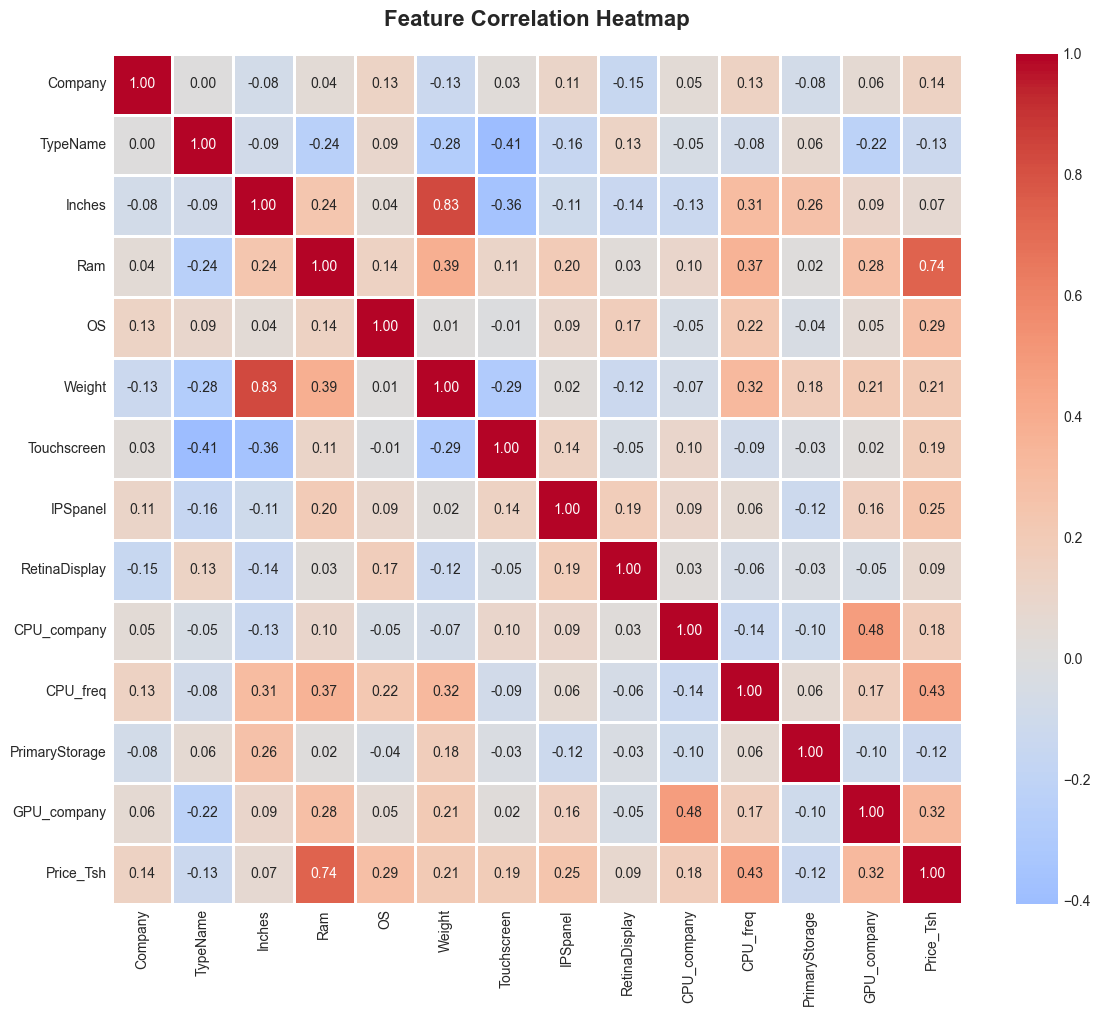


Top correlations with Price:
Price_Tsh         1.000000
Ram               0.740287
CPU_freq          0.428847
GPU_company       0.324300
OS                0.290199
IPSpanel          0.250737
Weight            0.211883
Touchscreen       0.188886
CPU_company       0.177881
Company           0.136541
RetinaDisplay     0.086775
Inches            0.066608
PrimaryStorage   -0.124775
TypeName         -0.125648
Name: Price_Tsh, dtype: float64


In [41]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop correlations with Price:")
price_corr = correlation_matrix['Price_Tsh'].sort_values(ascending=False)
print(price_corr)

In [42]:
# Split features and target
X = df_processed.drop('Price_Tsh', axis=1)
y = df_processed['Price_Tsh']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")

Features shape: (1275, 13)
Target shape: (1275,)

Feature names: ['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'PrimaryStorage', 'GPU_company']


In [43]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

X_train: (1020, 13)
y_train: (1020,)
X_test: (255, 13)
y_test: (255,)
1020 1020
255 255


In [44]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("After scaling:", len(y_test))



After scaling: 255


## 3. Model Training

### 3.1 Linear Regression Model

In [45]:
# Train Linear Regression model
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")

# Make predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)
print("After prediction:", len(y_test), len(y_pred_lr_test))
print(len(y_train), len(y_pred_lr_train))
print(len(y_test), len(y_pred_lr_test))
print("Predictions completed!")
print("y_test size:", len(y_test))
print("y_pred_lr_test size:", len(y_pred_lr_test))


Training Linear Regression Model...
Linear Regression model trained successfully!
After prediction: 255 255
1020 1020
255 255
Predictions completed!
y_test size: 255
y_pred_lr_test size: 255


In [46]:
# Make predictions on both training and testing sets
print("Making predictions...")

# Linear Regression
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Decision Tree
y_pred_dt_train = dt_model.predict(X_train_scaled)
y_pred_dt_test = dt_model.predict(X_test_scaled)

print("✓ Predictions completed")

Making predictions...
✓ Predictions completed


In [47]:
def evaluate_model(y_true, y_pred, model_name, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print("\n", model_name, "-", dataset_type)
    print("RMSE:", round(rmse, 3))
    print("MAE :", round(mae, 3))
    print("R2  :", round(r2, 3))
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }


In [48]:
# Evaluate Linear Regression
lr_train_metrics = evaluate_model(y_train, y_pred_lr_train, "Linear Regression", "Training")
lr_test_metrics = evaluate_model(y_test, y_pred_lr_test, "Linear Regression", "Testing")


 Linear Regression - Training
RMSE: 1137140.628
MAE : 819082.636
R2  : 0.674

 Linear Regression - Testing
RMSE: 1109883.762
MAE : 802372.892
R2  : 0.694


### 3.2 Decision Tree Model

In [49]:
# Train Decision Tree model
print("Training Decision Tree Model")
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
print("Decision Tree model trained successfully!")

# Make predictions
y_pred_dt_train = dt_model.predict(X_train_scaled)
y_pred_dt_test = dt_model.predict(X_test_scaled)

print("Predictions completed!")

Training Decision Tree Model
Decision Tree model trained successfully!
Predictions completed!


In [50]:
print("X_train_scaled:", X_train_scaled.shape)
print("y_train:", y_train.shape)

print("X_test_scaled:", X_test_scaled.shape)
print("y_test:", y_test.shape)

print("y_pred_lr_train:", y_pred_lr_train.shape)
print("y_pred_lr_test:", y_pred_lr_test.shape)


X_train_scaled: (1020, 13)
y_train: (1020,)
X_test_scaled: (255, 13)
y_test: (255,)
y_pred_lr_train: (1020,)
y_pred_lr_test: (255,)


## 4. Model Evaluation and Comparison

In [51]:
# Evaluate Decision Tree
dt_train_metrics = evaluate_model(y_train, y_pred_dt_train, "Decision Tree", "Training")
dt_test_metrics = evaluate_model(y_test, y_pred_dt_test, "Decision Tree", "Testing")


 Decision Tree - Training
RMSE: 508012.492
MAE : 313021.669
R2  : 0.935

 Decision Tree - Testing
RMSE: 959110.836
MAE : 673368.585
R2  : 0.772


In [52]:
# Determine best model based on Test R² Score
if lr_test_metrics['R2'] > dt_test_metrics['R2']:
    best_model = lr_model
    best_model_name = "Linear Regression"
    best_predictions = y_pred_lr_test
    best_r2 = lr_test_metrics['R2']
else:
    best_model = dt_model
    best_model_name = "Decision Tree"
    best_predictions = y_pred_dt_test
    best_r2 = dt_test_metrics['R2']

print(f"BEST MODEL: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f}")


BEST MODEL: Decision Tree
Test R² Score: 0.7718


## 5. Visualization

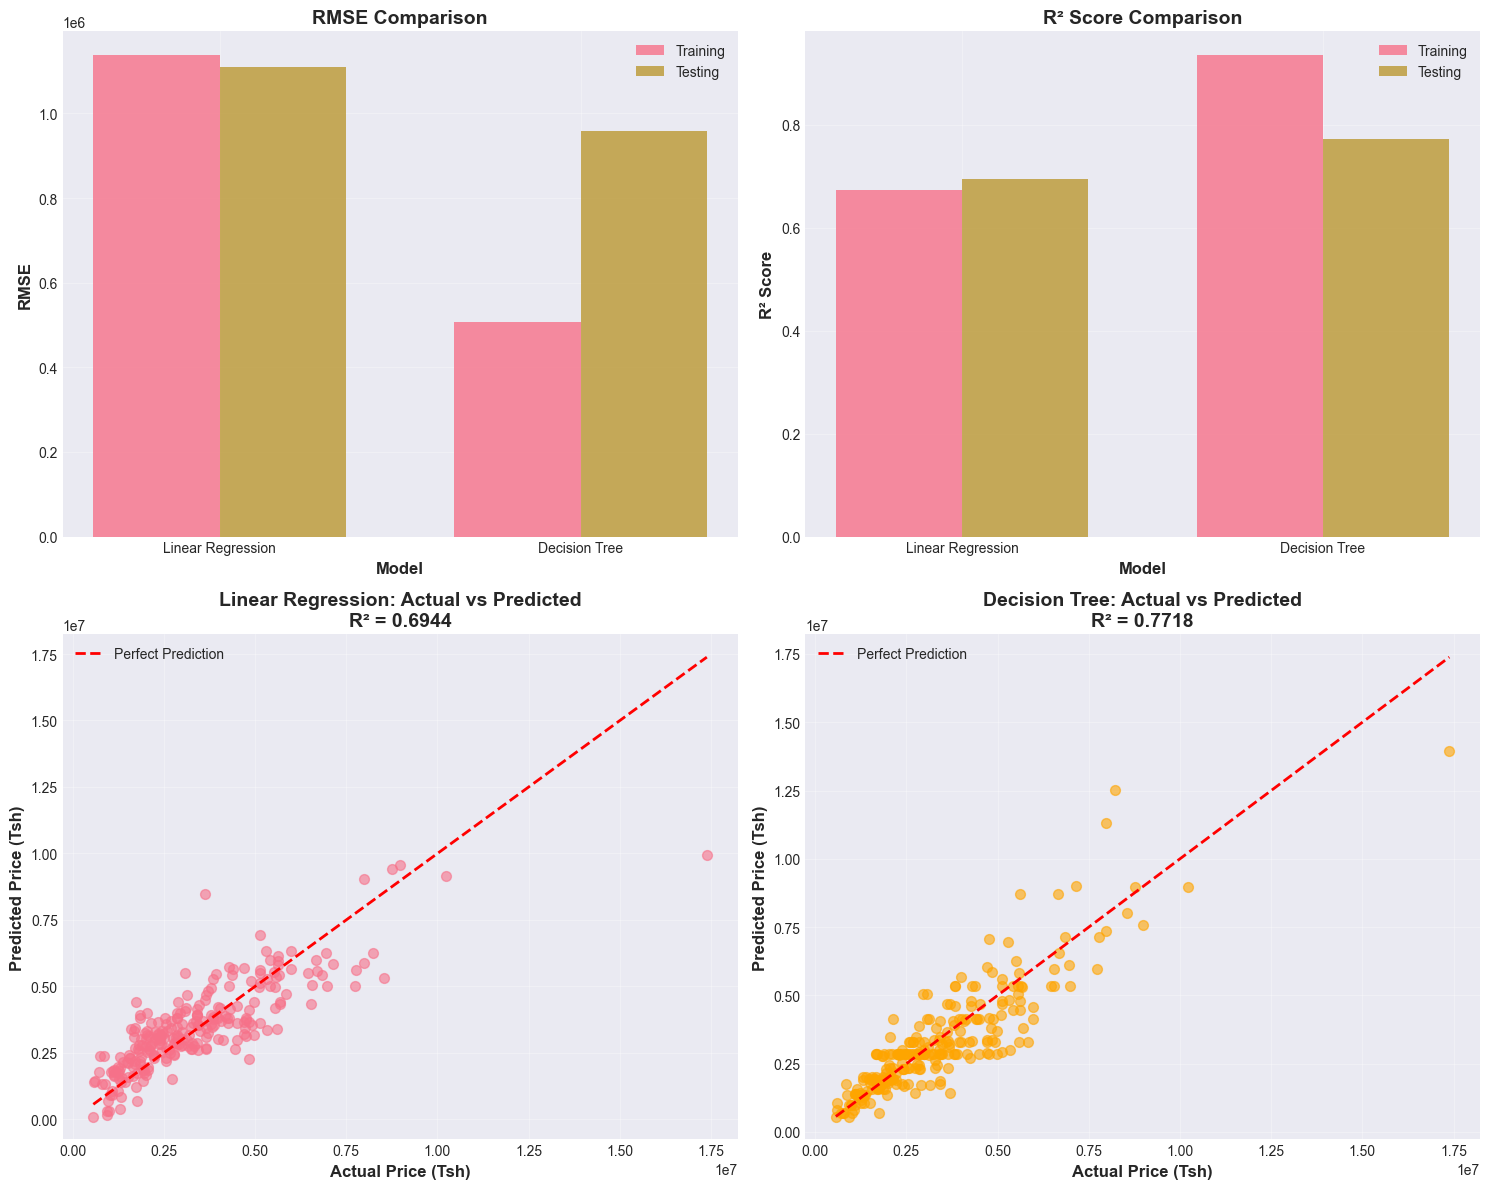

In [53]:
# Model comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. RMSE Comparison
models = ['Linear Regression', 'Decision Tree']
train_rmse = [lr_train_metrics['RMSE'], dt_train_metrics['RMSE']]
test_rmse = [lr_test_metrics['RMSE'], dt_test_metrics['RMSE']]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_rmse, width, label='Training', alpha=0.8)
axes[0, 0].bar(x + width/2, test_rmse, width, label='Testing', alpha=0.8)
axes[0, 0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. R² Score Comparison
train_r2 = [lr_train_metrics['R2'], dt_train_metrics['R2']]
test_r2 = [lr_test_metrics['R2'], dt_test_metrics['R2']]

axes[0, 1].bar(x - width/2, train_r2, width, label='Training', alpha=0.8)
axes[0, 1].bar(x + width/2, test_r2, width, label='Testing', alpha=0.8)
axes[0, 1].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Actual vs Predicted - Linear Regression
axes[1, 0].scatter(y_test, y_pred_lr_test, alpha=0.6, s=50)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Price (Tsh)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Predicted Price (Tsh)', fontsize=12, fontweight='bold')
axes[1, 0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_test_metrics["R2"]:.4f}', 
                     fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted - Decision Tree
axes[1, 1].scatter(y_test, y_pred_dt_test, alpha=0.6, s=50, color='orange')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Price (Tsh)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Predicted Price (Tsh)', fontsize=12, fontweight='bold')
axes[1, 1].set_title(f'Decision Tree: Actual vs Predicted\nR² = {dt_test_metrics["R2"]:.4f}', 
                     fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

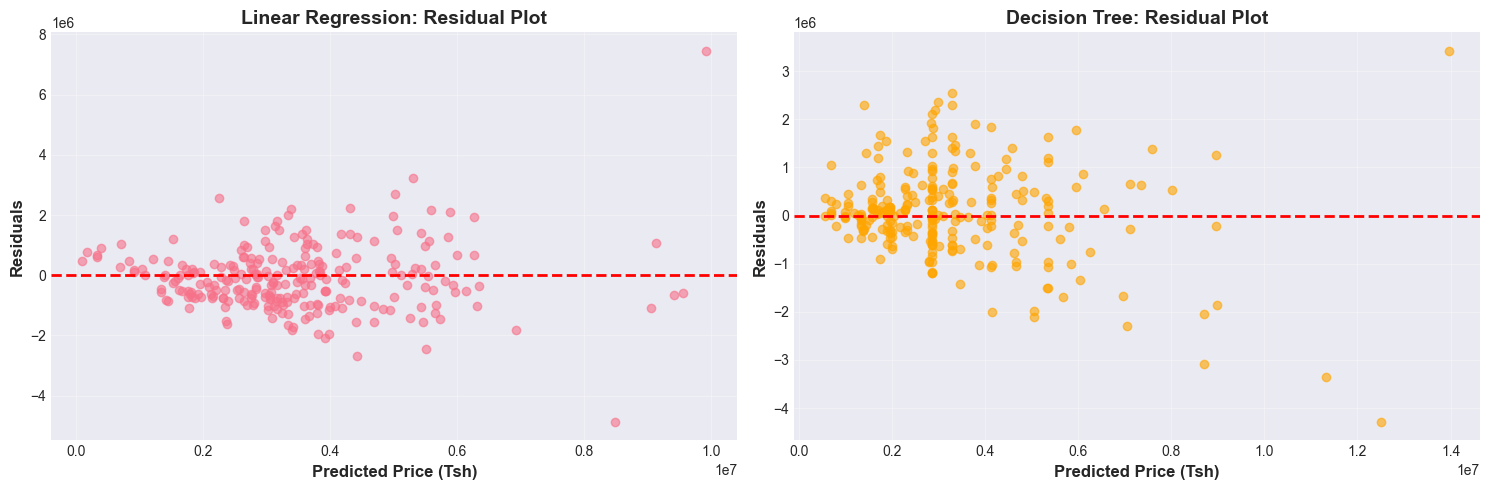

In [54]:
# Residual analysis for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear Regression residuals
residuals_lr = y_test - y_pred_lr_test
axes[0].scatter(y_pred_lr_test, residuals_lr, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Price (Tsh)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0].set_title('Linear Regression: Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Decision Tree residuals
residuals_dt = y_test - y_pred_dt_test
axes[1].scatter(y_pred_dt_test, residuals_dt, alpha=0.6, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price (Tsh)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1].set_title('Decision Tree: Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

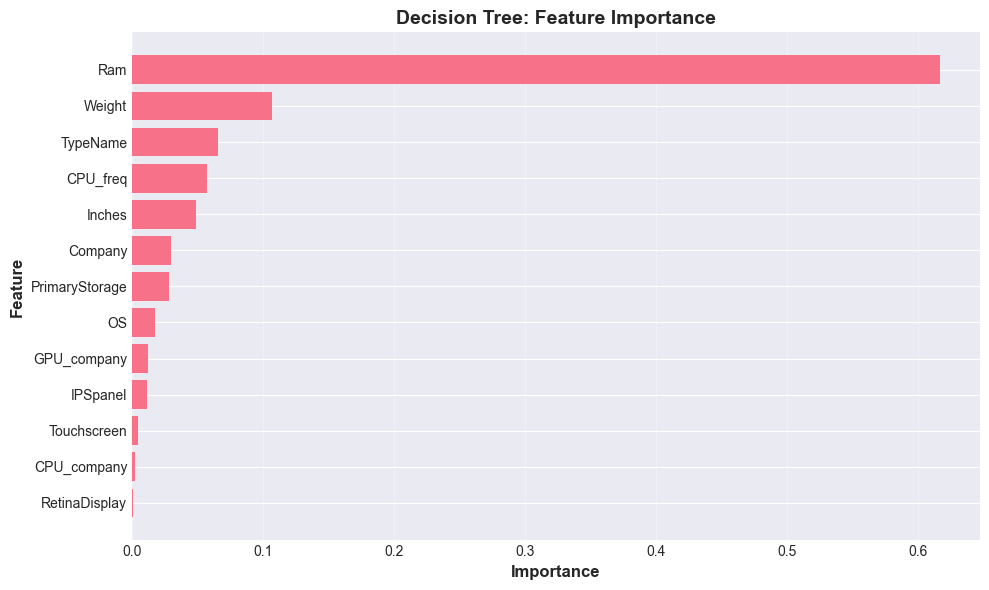


Top 5 Most Important Features:
     Feature  Importance
3        Ram    0.616312
5     Weight    0.106388
1   TypeName    0.065823
10  CPU_freq    0.057127
2     Inches    0.048949


In [55]:
# Feature importance (for Decision Tree)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Decision Tree: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

## 6. Save Best Model and Preprocessing Objects

In [56]:
# Save the best model
model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': list(X.columns),
    'model_name': best_model_name,
    'test_r2_score': best_r2,
    'test_rmse': lr_test_metrics['RMSE'] if best_model_name == 'Linear Regression' else dt_test_metrics['RMSE']
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print(f"✓ Best model ({best_model_name}) saved successfully as 'model.pkl'")
print(f"✓ Model R² Score: {best_r2:.4f}")
print(f"\nThe model file includes:")
print("  - Trained model")
print("  - Feature scaler")
print("  - Label encoders")
print("  - Feature names")
print("  - Model metadata")

✓ Best model (Decision Tree) saved successfully as 'model.pkl'
✓ Model R² Score: 0.7718

The model file includes:
  - Trained model
  - Feature scaler
  - Label encoders
  - Feature names
  - Model metadata


## 7. Model Testing with Sample Predictions

In [57]:
# Test the saved model with sample predictions
print("Testing the saved model with sample predictions...\n")

# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model_data = pickle.load(f)

# Get 5 random samples from test set
sample_indices = np.random.choice(X_test.index, 5, replace=False)
samples = X_test.loc[sample_indices]
actual_prices = y_test.loc[sample_indices]

# Make predictions
samples_scaled = loaded_model_data['scaler'].transform(samples)
predictions = loaded_model_data['model'].predict(samples_scaled)

# Display results
results_df = pd.DataFrame({
    'Actual Price (Tsh)': actual_prices.values,
    'Predicted Price (Tsh)': predictions,
    'Difference (Tsh)': actual_prices.values - predictions,
    'Error (%)': np.abs((actual_prices.values - predictions) / actual_prices.values * 100)
})

print("Sample Predictions:")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)
print(f"\nMean Absolute Error: {np.abs(results_df['Difference (Tsh)']).mean():,.2f} Tsh")
print(f"Mean Percentage Error: {results_df['Error (%)'].mean():.2f}%")

Testing the saved model with sample predictions...

Sample Predictions:
 Actual Price (Tsh)  Predicted Price (Tsh)  Difference (Tsh)  Error (%)
          1422150.0           1.507650e+06     -8.550000e+04   6.012024
          4500150.0           4.125772e+06      3.743780e+05   8.319235
          3987150.0           5.675775e+06     -1.688625e+06  42.351680
          6546307.5           5.951664e+06      5.946430e+05   9.083640
          1479150.0           1.955397e+06     -4.762471e+05  32.197347

Mean Absolute Error: 643,878.62 Tsh
Mean Percentage Error: 19.59%


# END OF SCRIPT
